# Function Inference

## Test

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
nb_classes = 10

model = Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps,data_dim)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

x_train = np.random.random((1000,timesteps,data_dim))
y_train = np.random.random((1000,nb_classes))

x_val = np.random.random((100,timesteps,data_dim))
y_val = np.random.random((100,nb_classes))

model.fit(x_train,y_train,batch_size=64,nb_epoch=5,validation_data=(x_val,y_val))

Using Theano backend.
ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 1s - loss: 11.4186 - acc: 0.1060 - val_loss: 11.4559 - val_acc: 0.1100
Epoch 2/5
1000/1000 [==============================] - 1s - loss: 11.4126 - acc: 0.1120 - val_loss: 11.4555 - val_acc: 0.1100
Epoch 3/5
1000/1000 [==============================] - 1s - loss: 11.4114 - acc: 0.1000 - val_loss: 11.4534 - val_acc: 0.1200
Epoch 4/5
1000/1000 [==============================] - 1s - loss: 11.4099 - acc: 0.1060 - val_loss: 11.4519 - val_acc: 0.1300
Epoch 5/5
1000/1000 [==============================] - 1s - loss: 11.4097 - acc: 0.1220 - val_loss: 11.4545 - val_acc: 0.1500


In [2]:
x_test = np.random.random((1,timesteps,data_dim))
model.predict(x_test)

array([[ 0.10044701,  0.09102966,  0.09954805,  0.10264879,  0.1045118 ,
         0.09519353,  0.09392653,  0.10579407,  0.10093626,  0.10596429]], dtype=float32)

In [39]:
from theano import config

ImportError: cannot import name gof

## Interpolation

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(100, input_dim=1, init='uniform',activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['accuracy'])

x_train = 2*math.pi*np.random.random((5000,1))
y_train = np.sin(x_train)

x_val = 2*math.pi*np.random.random((100,1))
y_val = np.sin(x_val)

model.fit(x_train,y_train, nb_epoch=100, batch_size=20, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 0s - loss: 0.1287 - acc: 0.0000e+00 - val_loss: 0.0652 - val_acc: 0.0000e+00
Epoch 2/100
4000/4000 [==============================] - 0s - loss: 0.0509 - acc: 0.0000e+00 - val_loss: 0.0365 - val_acc: 0.0000e+00
Epoch 3/100
4000/4000 [==============================] - 0s - loss: 0.0338 - acc: 0.0000e+00 - val_loss: 0.0216 - val_acc: 0.0000e+00
Epoch 4/100
4000/4000 [==============================] - 0s - loss: 0.0198 - acc: 0.0000e+00 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 5/100
4000/4000 [==============================] - 0s - loss: 0.0127 - acc: 0.0000e+00 - val_loss: 0.0245 - val_acc: 0.0000e+00
Epoch 6/100
4000/4000 [==============================] - 0s - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0185 - val_acc: 0.0000e+00
Epoch 7/100
4000/4000 [==============================] - 0s - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0165 - val_acc: 0.0000e+00
Epoch 8/100
40

## Prediction

In [29]:
out = model.predict(x_val)

## Comparsion

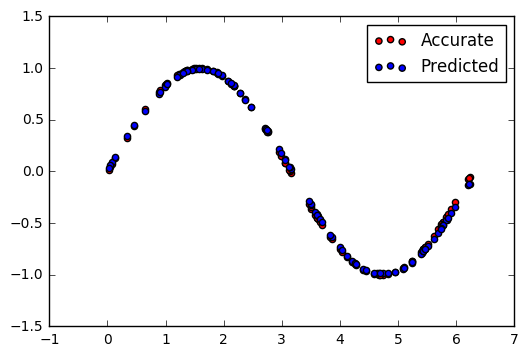

In [31]:
plt.scatter(x_val, y_val,c='r',label='Accurate')
plt.scatter(x_val,out,label='Predicted')
plt.legend(loc=1)
plt.show()  